# 第十五次课后练习

**负责助教：朱轩宇**

<span style="color:red; font-weight:bold;">请将作业文件命名为 第十五次课后练习+姓名+学号.ipynb, 例如 第十五次课后练习+张三+1000000000.ipynb</span>

<span style="color:red; font-weight:bold;">在作业过程中觉得有心得或者自己拓展学习到有价值内容的，可以在文件名最后加一个#号。例如第十五次课后练习+张三+1000000000+#.ipynb</span>

# 第零部分 代码理解

请认真阅读代码，理解代码的功能，先写出预想的结果。运行并检验结果是否如预期。如果不如预期，请分析理解其中的原因

## **0.1** 成分分解
    阅读下面代码，观察运行的结果，解释出现这个结果的原因。

需要使用到statsmodels中的seasonal_decompose进行分解

https://www.statsmodels.org/dev/generated/statsmodels.tsa.seasonal.seasonal_decompose.html

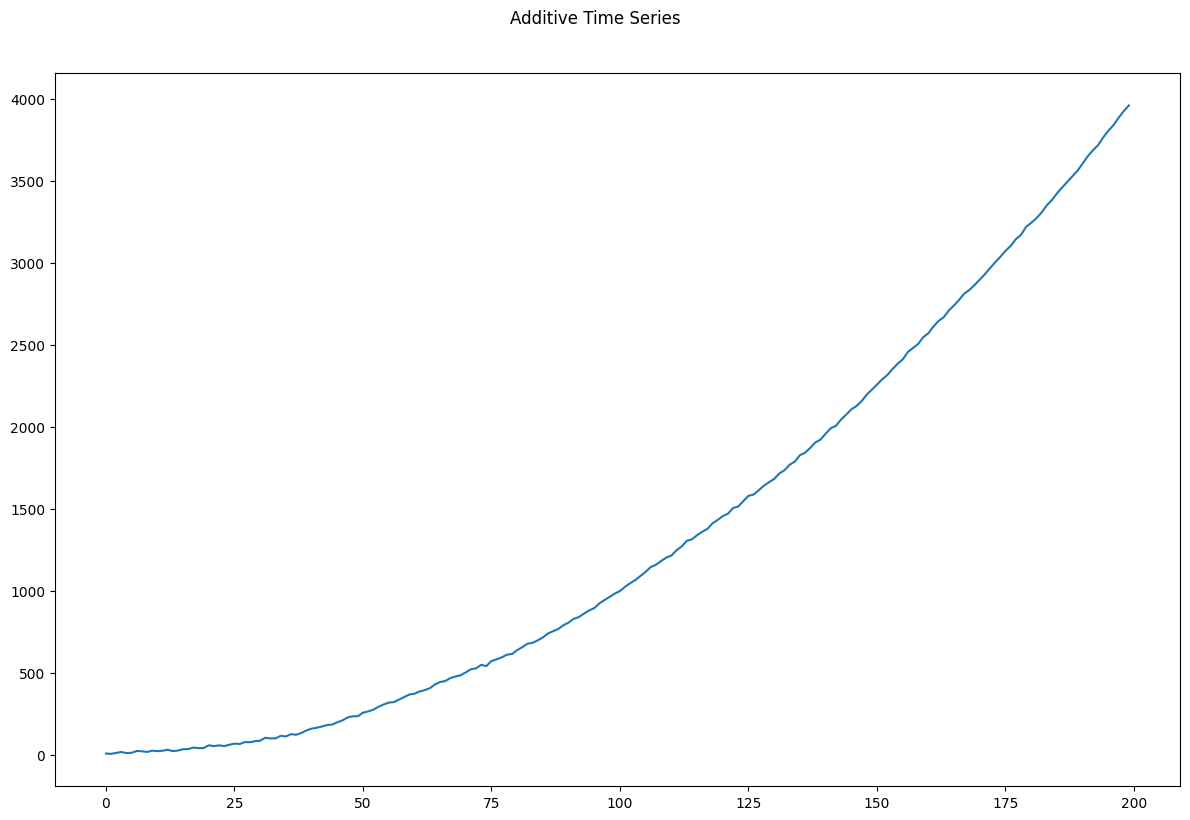

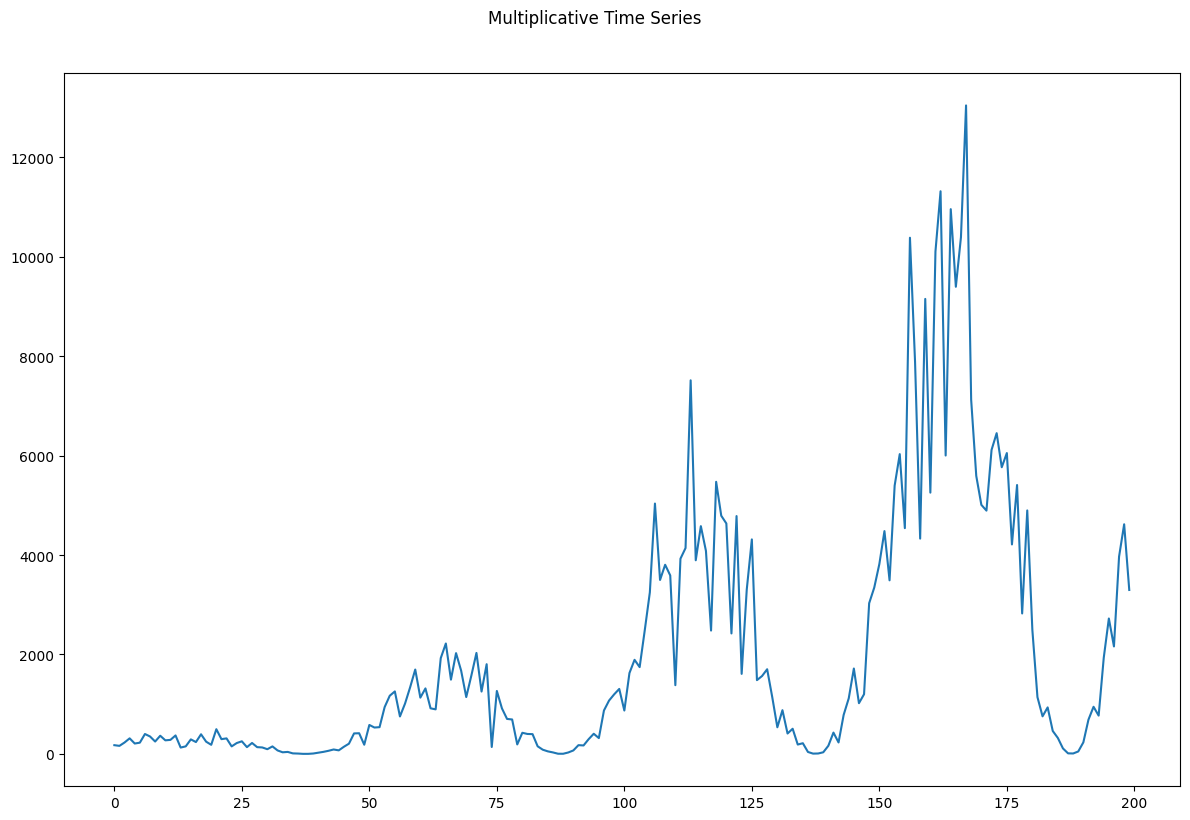

<Figure size 1200x800 with 0 Axes>

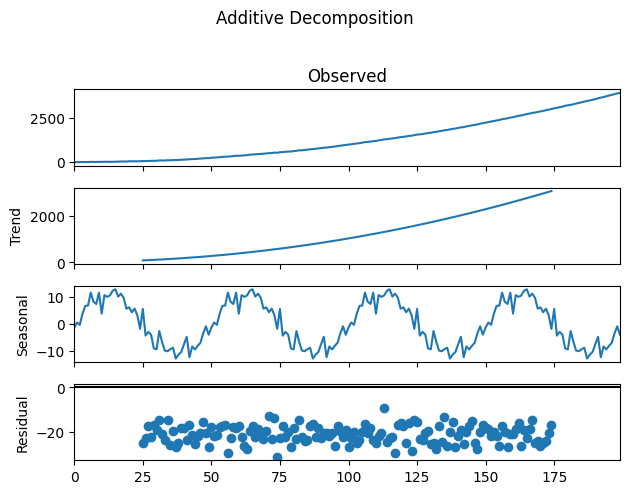

<Figure size 1200x800 with 0 Axes>

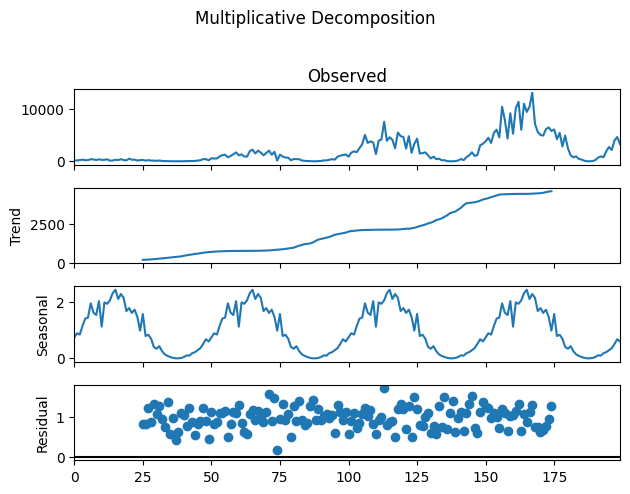

'\n分解方法:\n使用seasonal_decompose函数进行分解\n加法模型分解: 将序列分解为趋势、季节性和残差三部分的和\n乘法模型分解: 将序列分解为趋势、季节性和残差三部分的乘积\n'

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose


# 可视化
def plot(data, title):
    plt.figure(figsize=(12,8))
    if hasattr(data, 'plot'):  # Check if data has plot method (DecomposeResult)
        data.plot()
    else:  # For numpy arrays
        plt.plot(data)
    plt.suptitle(title, y=1.02)
    plt.tight_layout()
    
# 生成模拟时序数据（趋势+周期+噪声）
np.random.seed(42)
t = np.arange(200)
trend = 0.1 * t**2  # 二次趋势项
seasonal = 10 * np.sin(2 * np.pi * t / 50)  # 周期项
noise = np.random.normal(5, 5, 200)  # 高斯噪声 # 白噪声

# 加法模型合成
additive = trend + seasonal + noise
plot(additive, "Additive Time Series")

# 乘法模型合成
multiplicative = (trend + 100) * (seasonal/10 + 1) * (noise/10 + 1)
plot(multiplicative, "Multiplicative Time Series")
"""
生成一个包含趋势项(二次函数)、季节项(正弦波)和噪声项(高斯分布)的合成时间序列
加法模型: trend + seasonal + noise
乘法模型: (trend + 100) * (seasonal/10 + 1) * (noise/10 + 1)
"""

# 加法模型分解
result_add = seasonal_decompose(additive, model='additive', period=50)
plot(result_add, "Additive Decomposition")

# 乘法模型分解
result_mul = seasonal_decompose(multiplicative, model='multiplicative', period=50)
plot(result_mul, "Multiplicative Decomposition")
plt.show()

"""
分解方法:
使用seasonal_decompose函数进行分解
加法模型分解: 将序列分解为趋势、季节性和残差三部分的和
乘法模型分解: 将序列分解为趋势、季节性和残差三部分的乘积
"""

### 移动平均滤波（等权均值）
特点：窗口内等权重，适合快速去除高频噪声

#### 移动平均滤波原理

移动平均滤波是时间序列分析中最基本、最常用的平滑技术之一。其基本思想是使用时间序列中特定窗口内的数据平均值来替代原始数据点，从而减少随机波动的影响。

**数学表达式**：
对于时间序列 $\{x_t\}$，窗口大小为 $k$ 的移动平均可以表示为：

$$MA_t = \frac{1}{k} \sum_{i=0}^{k-1} x_{t-i}$$

其中：
- $MA_t$ 是 $t$ 时刻的移动平均值
- $k$ 是窗口大小
- $x_{t-i}$ 是 $t-i$ 时刻的原始数据值

**中心化移动平均**：
为了避免时间滞后，可以使用中心化移动平均：

$$MA_t = \frac{1}{k} \sum_{i=-\lfloor k/2 \rfloor}^{\lfloor k/2 \rfloor} x_{t+i}$$

这样处理后的数据点会更好地反映该时点的平均水平，而不会产生明显的相位延迟。

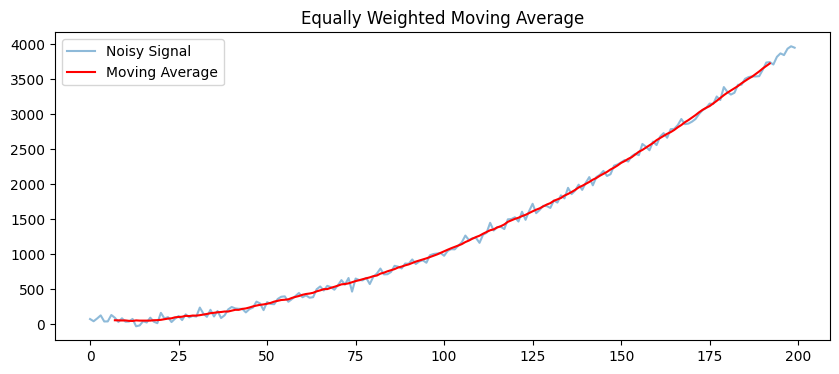

In [8]:
def moving_average(data, window_size):
    return data.rolling(window=window_size, center=True).mean()

# 添加噪声的原始信号
raw_signal = trend + noise*10
ma_signal = moving_average(pd.Series(raw_signal), window_size=15)
# 这是在pandas中实现的简单移动平均，窗口长度为 15【从x-7到x+7来计算平均值作为x处的值】
"""移动平均滤波:直接调用pandas的rolling函数，注意要取mean
使用等权重滑动窗口计算平均值
中心化处理避免相位延迟
适合快速去除高频噪声
"""

plt.figure(figsize=(10,4))
plt.plot(raw_signal, label='Noisy Signal', alpha=0.5)
plt.plot(ma_signal, label='Moving Average', color='red')
plt.title("Equally Weighted Moving Average")
plt.legend()
plt.show()

### 指数加权滤波
特点：近期数据权重高，对突变响应更快

### 指数加权滤波的数学原理
指数加权滤波是一种平滑技术，通过对时间序列中的数据点赋予不同的权重来实现。权重随着时间的推移呈指数递减，越接近当前时刻的数据点权重越大。

#### 数学表达式
指数加权滤波的公式如下：
$$S_t = \alpha X_t + (1 - \alpha) S_{t-1}$$
其中：
- $S_t$ 是时刻 $t$ 的平滑值
- $X_t$ 是时刻 $t$ 的原始数据值
- $\alpha$ 是平滑因子，取值范围为 $0 < \alpha \leq 1$
- $S_{t-1}$ 是时刻 $t-1$ 的平滑值

#### 特点
- $\alpha$ 越大，当前数据点的权重越高，滤波对突变的响应越快；
- $\alpha$ 越小，历史数据的权重越高，滤波效果越平滑。

#### 初始条件
通常，$S_0$ 可以取为时间序列的第一个数据点，即 $S_0 = X_0$。

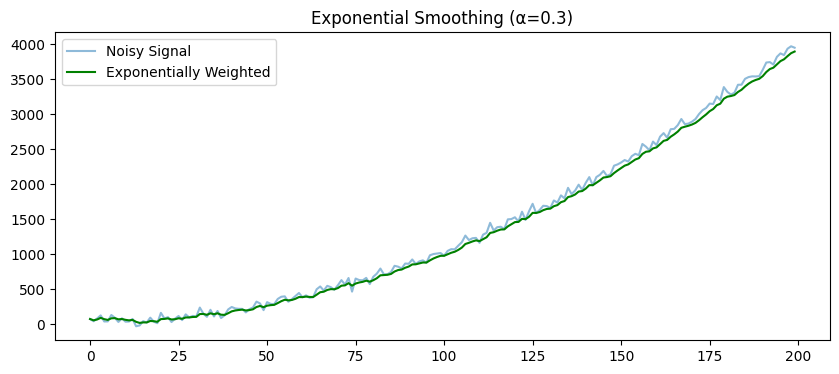

In [9]:
def exponential_smoothing(data, alpha=0.3):
    return data.ewm(alpha=alpha).mean()

ewma_signal = exponential_smoothing(pd.Series(raw_signal))
"""指数加权滤波:直接调用pandas的ewm方法，
近期数据权重更高，对突变响应更快
平滑因子α控制权重衰减速度(α越大，近期权重越高)
"""

plt.figure(figsize=(10,4))
plt.plot(raw_signal, label='Noisy Signal', alpha=0.5)
plt.plot(ewma_signal, label='Exponentially Weighted', color='green')
plt.title("Exponential Smoothing (α=0.3)")
plt.legend()
plt.show()

## **0.2** 平稳序列
    阅读下面代码，观察运行的结果，解释出现这个结果的原因。

平稳序列（Stationary Time Series）是指其统计特性（如均值、方差、自相关性）不随时间推移而发生显著变化的随机过程。换句话说，序列的行为在不同时间段内是相似的。

更具体地，通常指的是**宽平稳（Weak-sense Stationarity or Covariance Stationarity）**，它要求满足以下三个条件：

1.  **均值恒定：** 序列的均值 E(Yt) 是一个与时间 t 无关的常数 μ。
2.  **方差恒定：** 序列的方差 Var(Yt) 是一个与时间 t 无关的常数 σ²。
3.  **自协方差仅与时间间隔有关：** 序列在任意两个时刻 t 和 t-k 的协方差 Cov(Yt, Yt-k) 只依赖于时间间隔 k，而与具体的时间点 t 无关。即 γk = Cov(Yt, Yt-k)。

**为什么平稳性很重要？**

*   **简化分析：** 平稳序列的统计特性不随时间变化，这使得我们可以用过去的行为来推断未来的行为，大大简化了建模和预测过程。
*   **模型基础：** 许多经典的时间序列模型（如 ARMA、ARIMA 的一部分）都假设或要求数据是平稳的。

**如何判断平稳性？**

*   **观察时序图：** 图形是否围绕一个固定水平波动，波动幅度是否大致一致。
*   **观察自相关图 (ACF) 和偏自相关图 (PACF)：** 平稳序列的 ACF 通常会快速衰减至零，而非平稳序列的 ACF 衰减很慢。
*   **统计检验：** 使用单位根检验（Unit Root Tests），如 ADF 检验（Augmented Dickey-Fuller test）或 KPSS 检验（Kwiatkowski-Phillips-Schmidt-Shin test）。

如果序列非平稳，通常需要通过差分（Differencing）、对数变换（Log Transformation）等方法将其转换为平稳序列后再进行分析。

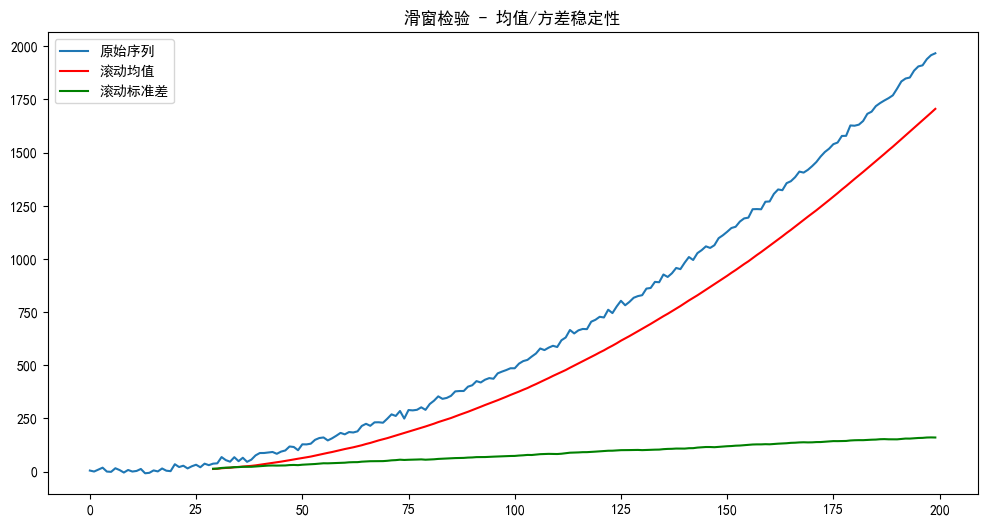

ADF Test for 原始序列
ADF Statistic: 2.3085
p-value: 0.9990
Critical Values:
	1%: -3.466
	5%: -2.877
	10%: -2.575
序列是否平稳：否


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf

plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置中文字体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号'-'显示为方块的问题

# 生成非平稳序列（趋势+周期+噪声）
np.random.seed(42)
t = np.arange(200)
trend = 0.05 * t**2 + 3*np.sin(0.2*np.pi*t)
noise = np.random.normal(0, 10, 200)
non_stationary = trend + noise
"""
数据生成:
1. 二次趋势项: 0.05 * t**2
2. 周期项: 3 * sin(0.2 * π * t)
3. 高斯噪声: np.random.normal(0, 10, 200)
4. 合成非平稳序列: trend + noise
"""

# 滑窗检验函数
def window_stationarity_test(data, window_size=30):
    rolling_mean = data.rolling(window=window_size).mean()
    rolling_std = data.rolling(window=window_size).std()
    
    plt.figure(figsize=(12,6))
    plt.plot(data, label='原始序列')
    plt.plot(rolling_mean, label='滚动均值', color='red')
    plt.plot(rolling_std, label='滚动标准差', color='green')
    plt.legend()
    plt.title("滑窗检验 - 均值/方差稳定性")
    plt.show()
    """
    滑窗检验:
    1. 计算滚动均值和滚动标准差
    2. 可视化原始序列、滚动均值和滚动标准差
    3. 观察均值和方差是否随时间变化
    4. 如果均值和方差稳定，则序列平稳
    """

# ADF检验函数
def adf_test(series, name=''):
    """ 
    ADF检验:
    1. 使用adfuller函数进行ADF检验
    2. 输出ADF统计量、p值和临界值
    3. 根据p值判断序列是否平稳(p值<0.05越小表示序列平稳)
    """
    result = adfuller(series.dropna())
    print(f'ADF Test for {name}')
    print(f'ADF Statistic: {result[0]:.4f}')
    print(f'p-value: {result[1]:.4f}')
    print(f'Critical Values:')
    for key, value in result[4].items():
        print(f'\t{key}: {value:.3f}')
    return result[1] < 0.05  # 返回是否平稳

# 执行检验
window_stationarity_test(pd.Series(non_stationary))
is_stationary = adf_test(pd.Series(non_stationary), "原始序列")
print(f"序列是否平稳：{'是' if is_stationary else '否'}")

序列在第 2 次差分后平稳 (p-value=0.0000)


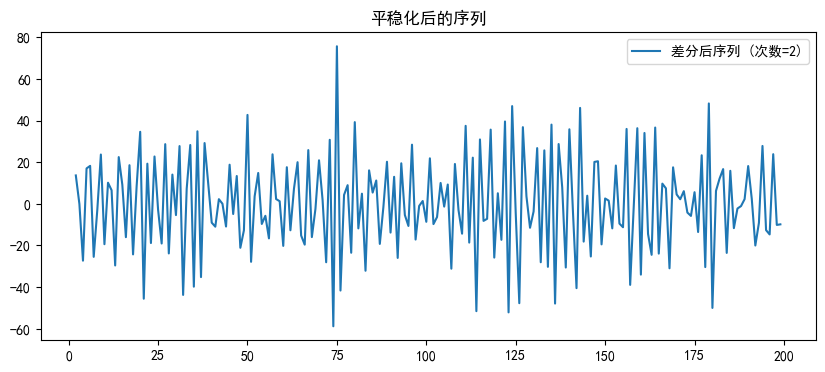

In [11]:
# 差分平稳化函数
def difference_until_stationary(data, max_diff=5):
    diff_data = data
    diff_count = 0
    for i in range(max_diff):
        adf_result = adfuller(diff_data.dropna())
        p_value = adf_result[1] # 一定取的是第二项才是p-value
        if p_value < 0.05:
            print(f"序列在第 {diff_count} 次差分后平稳 (p-value={p_value:.4f})")
            return diff_data, diff_count
        diff_data = diff_data.diff()
        diff_count += 1
        """
        迭代进行差分运算直到ADF检验通过
        直接调用pandas的diff方法进行差分：diff_data = diff_data.diff()
        """
    print("序列在最大差分次数后仍未平稳")
    return diff_data, diff_count

# 差分平稳化
stationary_data, diff_count = difference_until_stationary(pd.Series(non_stationary))

# 绘制平稳化后的序列
plt.figure(figsize=(10, 4))
plt.plot(stationary_data, label=f"差分后序列 (次数={diff_count})")
plt.title("平稳化后的序列")
plt.legend()
plt.show()

## **0.3** 序列自（相关）回归模型
    阅读下面代码，观察运行的结果，解释出现这个结果的原因。

### 序列自（相关）回归模型简介

序列自相关回归模型（Autoregressive Model，简称 AR 模型）是一种时间序列分析模型，用于描述当前时间点的值与其过去若干时间点的值之间的关系。它假设时间序列的当前值是其过去值的线性组合加上一个随机误差项。

AR 模型是时间序列分析中最基本的模型之一，常用于建模平稳时间序列。

---

### 数学定义

AR 模型的数学表达式为：

$$
X_t = c + \phi_1 X_{t-1} + \phi_2 X_{t-2} + \dots + \phi_p X_{t-p} + \epsilon_t
$$

其中：
- $ X_t $：时间 $ t $ 的观测值；
- $ c $：常数项；
- $ \phi_1, \phi_2, \dots, \phi_p $：模型的自回归系数；
- $ p $：模型的阶数（即使用的过去时间点的数量）；
- $ \epsilon_t $：随机误差项，通常假设为均值为 0、方差为 $ \sigma^2 $ 的白噪声。

---

### 特点

1. **平稳性**：
   - AR 模型要求时间序列是平稳的，即均值、方差和自相关结构不随时间变化。
   - 如果序列非平稳，可以通过差分等方法将其转换为平稳序列。

2. **自相关性**：
   - AR 模型利用时间序列的自相关性，当前值由过去值的线性组合决定。

3. **阶数选择**：
   - 模型的阶数 $ p $ 决定了使用多少个过去的时间点。阶数可以通过信息准则（如 AIC 或 BIC）或自相关图（ACF）和偏自相关图（PACF）来确定。

---

### AR(1) 模型示例

当 $ p = 1 $ 时，AR 模型简化为：

$$
X_t = c + \phi_1 X_{t-1} + \epsilon_t
$$

- 当前值 $ X_t $ 仅由前一个时间点的值 $ X_{t-1} $ 和随机误差项 $ \epsilon_t $ 决定。

---

### 扩展模型

- **ARMA 模型**：结合自回归（AR）和移动平均（MA）模型。
- **ARIMA 模型**：在 ARMA 模型基础上加入差分操作，用于非平稳序列。
- **SARIMA 模型**：扩展 ARIMA 模型以处理季节性数据。

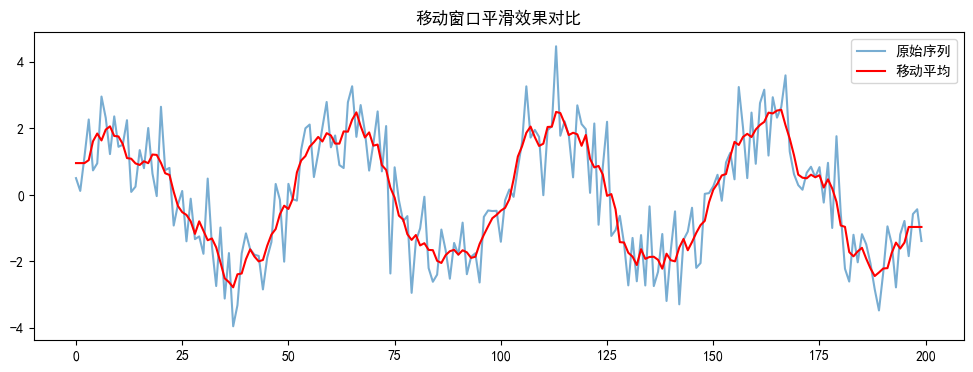

/Users/gaojingxing/miniconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/gaojingxing/miniconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  200
Model:                 ARIMA(1, 0, 2)   Log Likelihood                -306.785
Date:                Sun, 27 Apr 2025   AIC                            623.570
Time:                        13:21:28   BIC                            640.062
Sample:                             0   HQIC                           630.244
                                - 200                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0620      0.623     -0.099      0.921      -1.283       1.159
ar.L1          0.9387      0.032     29.794      0.000       0.877       1.000
ma.L1         -0.6356      0.084     -7.583      0.0

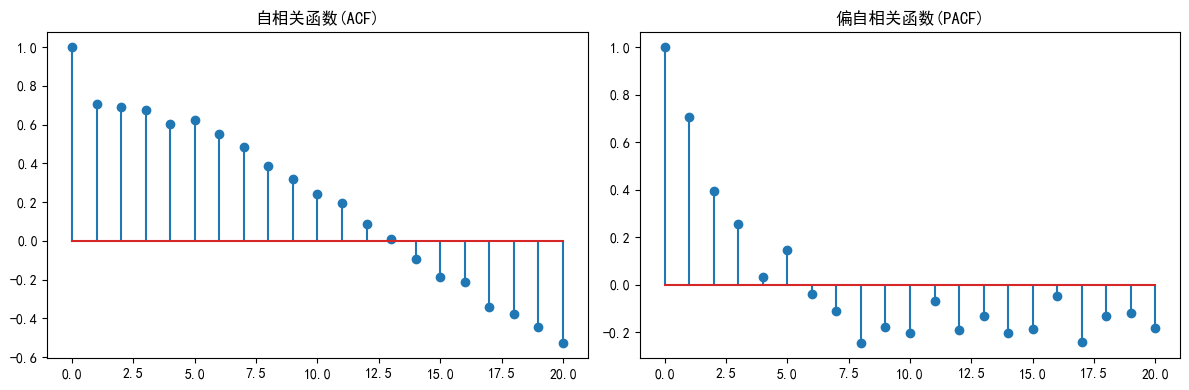

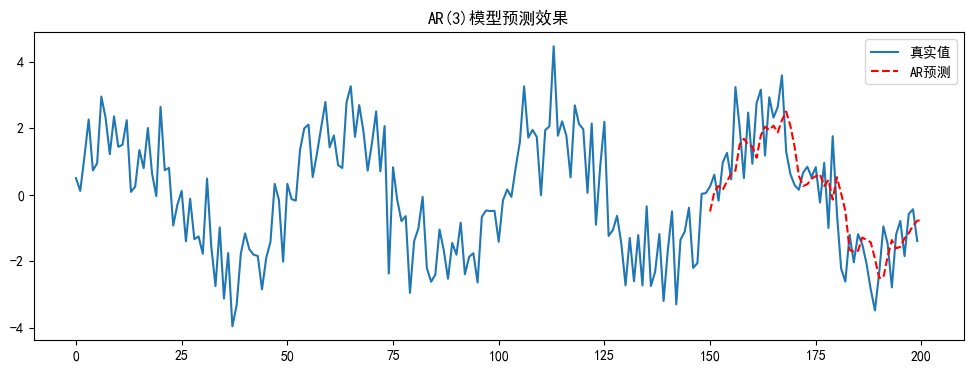

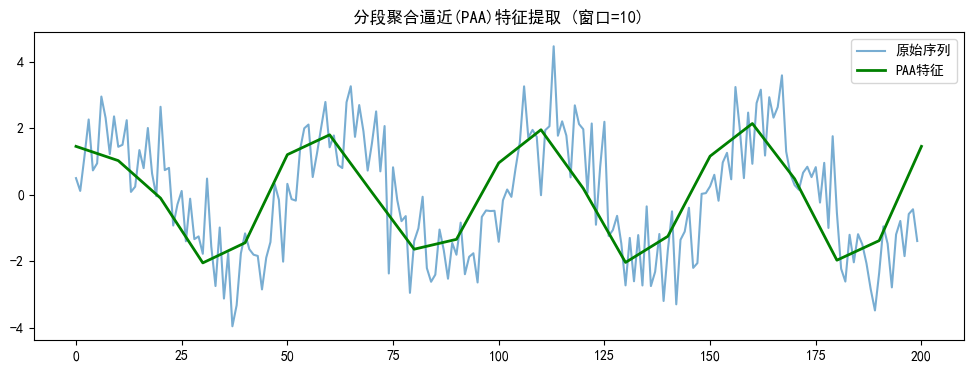

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import arma_order_select_ic
from sklearn.metrics import mean_squared_error

# ================== 1. 数据生成与预处理 ==================
np.random.seed(42)
t = np.arange(200) # 生成时间序列【0～199】
sine_wave = 2 * np.sin(2 * np.pi * t / 50)
noise = np.random.normal(0, 1, 200)
ts_data = sine_wave + noise
"""
数据生成:
季节项: 2 * sin(2 * π * t / 50)
趋势项: 0
噪声项: 200项的标准正态：np.random.normal(0, 1, 200)
合成时序数据: sine_wave + noise （200项）
平稳性: 该序列是平稳的（一个周期内均值0恒定，方差恒定，且自协方差仅依赖于时间差：时间序列的自协方差只与时间间隔有关，而与具体的时间点无关。）
"""

# ================== 2. 移动窗口平滑 ==================
def moving_average(data, window_size=5):
    window = np.ones(window_size)/window_size # 创建等权重窗口[0.2,0.2,0.2,0.2,0.2]
    smoothed = np.convolve(data, window, mode='same') # 卷积运算实现移动平均
    # 处理边界效应
    smoothed[:window_size//2] = smoothed[window_size//2] # 前边界用第一个有效值填充
    smoothed[-window_size//2:] = smoothed[-window_size//2-1] # 后边界用最后一个有效值填充
    """注意要填充前后边界的值，避免卷积运算导致的边界效应"""
    return smoothed

smoothed_ts = moving_average(ts_data)

plt.figure(figsize=(12,4))
plt.plot(ts_data, label='原始序列', alpha=0.6)
plt.plot(smoothed_ts, label='移动平均', color='red')
plt.title("移动窗口平滑效果对比")
plt.legend()
plt.show()

# ================== 3. 自回归模型(AR) ==================
# 计算自相关与偏自相关
lag = 20 # 滞后阶数，X_t由X_{t-1},X_{t-2},...,X_{t-lag}决定
acf_values = acf(ts_data, nlags=lag) # 计算自相关函数
pacf_values = pacf(ts_data, nlags=lag) # 计算偏自相关函数
"""偏自相关是在控制其他滞后项的影响下，X_t与X_{t-lag}之间的直接相关性
自相关函数ACF: 计算X_t与X_{t-lag}之间的相关性
偏自相关函数PACF: 计算X_t与X_{t-lag}之间的直接相关性，控制其他滞后项的影响
"""

plt.figure(figsize=(12,4))
plt.subplot(121) # 左侧子图
plt.stem(acf_values)
plt.title('自相关函数(ACF)')

plt.subplot(122) # 右侧子图
plt.stem(pacf_values)
plt.title('偏自相关函数(PACF)')
plt.tight_layout()

# 基于PACF选择AR阶数
p = 3  # 根据PACF截尾确定
ar_model = AutoReg(ts_data, lags=p) # 自回归模型
ar_result = ar_model.fit()

# 预测与评估
predict_start = 150
predict_end = 200
ar_predict = ar_result.predict(start=predict_start, end=predict_end) # 预测起始点、结束点

plt.figure(figsize=(12,4))
plt.plot(ts_data, label='真实值')
plt.plot(range(predict_start,predict_end+1), ar_predict, 
        label='AR预测', color='red', linestyle='--')
plt.title(f'AR({p})模型预测效果')
plt.legend()

# ================== 4. ARMA模型选阶 ==================
# 自动选择最优阶数(p,q) # 让系统自动选择最优阶数，不用手动指定阶数
order_select = arma_order_select_ic(ts_data, max_ar=4, max_ma=2, ic=['aic','bic']) # max_ar: AR最大阶数4, max_ma: MA最大阶数2, ic: 使用AIC和BIC准则
best_order = order_select['aic_min_order'] # 选择AIC最小的阶数

# 模型拟合
arma_model = ARIMA(ts_data, order=(best_order[0],0,best_order[1])) # ARIMA模型, order=(p,d,q),其中p为AR阶数，d为差分阶数，q为Moving Average阶数
arma_result = arma_model.fit()

print("="*40)
print(arma_result.summary())
print(f"最优阶数选择(p,q): {best_order}")

# ================== 5. PAA特征提取 ==================
# PAA：分段聚合逼近
"""PAA原理：
1. 将时间序列分为若干段，每段长度为窗口大小
2. 对每段内的值进行均值计算，得到一个新的时间序列
3. 新的时间序列长度为原始序列长度除以窗口大小
4. PAA特征提取可以用于降维、特征选择等任务
"""
def paa_transform(series, window_size):
    n = len(series)
    # 处理长度非整数倍情况
    resized = np.resize(series, (n + window_size - n % window_size,))
    segments = resized.reshape(-1, window_size) # 分段
    return np.mean(segments, axis=1) # 计算每段均值

paa_window = 10 # PAA窗口大小
paa_result = paa_transform(ts_data, paa_window)

plt.figure(figsize=(12,4))
plt.plot(ts_data, label='原始序列', alpha=0.6)
plt.plot(np.linspace(0,200,len(paa_result)), paa_result, 
        label='PAA特征', color='green', linewidth=2)
plt.title(f"分段聚合逼近(PAA)特征提取 (窗口={paa_window})")
plt.legend()

# ================== 6. 模型评估 ==================
# 计算AR模型MSE
ar_mse = mean_squared_error(ts_data[predict_start:predict_end+1], ar_predict[1::])
print(f"\nAR({p})模型MSE: {ar_mse:.4f}")
# 计算MSE

# 计算ARMA预测误差
arma_predict = arma_result.forecast(steps=20) # 调用forecast进行预测
true_values = ts_data[-20:] # 最后20个真实值
arma_mse = mean_squared_error(true_values, arma_predict) # 调用mean_squared_error计算均方误差MSE
print(f"ARMA{best_order}预测MSE: {arma_mse:.4f}")

## **0.4** 线性回归-多项式回归
    阅读下面代码，观察运行的结果，解释出现这个结果的原因。

### 一元线性回归

**关键实现解析**：
1. **数学公式实现**  
   - 斜率计算：$\beta_1 = \frac{\sum(x_i-\bar{x})(y_i-\bar{y})}{\sum(x_i-\bar{x})^2}$
   - 截距计算：$\beta_0 = \bar{y} - \beta_1\bar{x}$
   - 协方差与方差计算采用向量化运算提升效率

2. **评估指标扩展**  
   - 增加R²值计算：$R^2 = 1 - \frac{SS_{res}}{SS_{tot}}$，该指标反映模型解释变量变化的能力

3. **可视化增强**  
   - 在图中叠加显示回归方程和R²值，直观展示拟合效果

**数学推导补充**：
1. 目标函数：最小化残差平方和 $\min \sum(y_i - (\beta_0 + \beta_1x_i))^2$
2. 通过求偏导建立正规方程组：
   $$\begin{cases}
   n\beta_0 + \beta_1\sum x_i = \sum y_i \\
   \beta_0\sum x_i + \beta_1\sum x_i^2 = \sum x_iy_i
   \end{cases}$$
3. 解方程组得到上述的$\beta_0$和$\beta_1$表达式

回归方程: y = 20.83x + 3.76
R²值: 0.9551


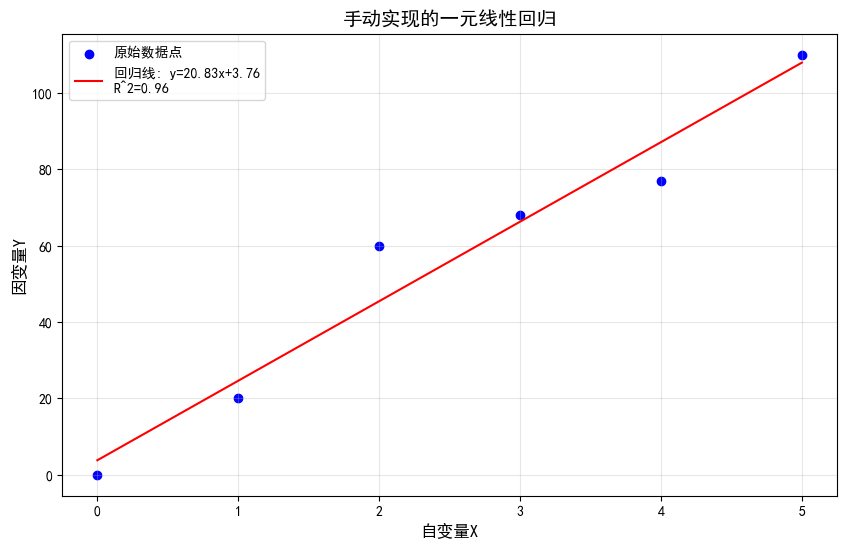

In [6]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置中文字体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号'-'显示为方块的问题


# 数学原理实现类
class SimpleLinearRegression:
    def __init__(self):
        self.a = 0  # 截距
        self.b = 0  # 斜率
    
    def fit(self, x, y):
        """参数计算：最小二乘法公式推导"""
        x_mean = np.mean(x)
        y_mean = np.mean(y)
        
        # 协方差计算
        numerator = np.sum((x - x_mean) * (y - y_mean))
        # 方差计算
        denominator = np.sum((x - x_mean) ** 2)
        
        self.b = numerator / denominator # 斜率计算公式
        self.a = y_mean - self.b * x_mean  # 截距计算公式
        """手动实现线性回归模型的拟合：
        1. 计算自变量x和因变量y的均值
        2. 计算协方差和方差
        3. 斜率b = 协方差 / 方差
        4. 截距a = y均值 - b * x均值
        """
    
    def predict(self, x):
        return self.a + self.b * x
    
    def score(self, x, y):
        """R²计算：拟合优度指标"""
        ss_total = np.sum((y - np.mean(y)) ** 2)
        ss_res = np.sum((y - self.predict(x)) ** 2)
        return 1 - (ss_res / ss_total)


# 原始数据
x = np.array([0, 1, 2, 3, 4, 5])
y = np.array([0, 20, 60, 68, 77, 110])

# 模型训练
model = SimpleLinearRegression() # 手写线性回归模型
model.fit(x, y)

# 输出结果
print(f"回归方程: y = {model.b:.2f}x + {model.a:.2f}")
print(f"R²值: {model.score(x, y):.4f}")

# 可视化
plt.figure(figsize=(10,6))
plt.scatter(x, y, color='blue', label='原始数据点')
plt.plot(x, model.predict(x), color='red', 
            label=f'回归线: y={model.b:.2f}x+{model.a:.2f}\nR^2={model.score(x,y):.2f}')
plt.xlabel('自变量X', fontsize=12)
plt.ylabel('因变量Y', fontsize=12)
plt.title('手动实现的一元线性回归', fontsize=14)
plt.grid(alpha=0.3)
plt.legend()
plt.show()

### 一元高次多项式回归（非线性拟合）

多项式回归是线性回归的一种扩展形式，通过引入高次项将非线性问题转化为线性问题。对于一元高次多项式回归，其数学表达式为：

$$y = \beta_0 + \beta_1 x + \beta_2 x^2 + \beta_3 x^3 + ... + \beta_n x^n + \varepsilon$$

其中：

$y$ 是因变量
$x$ 是自变量
$\beta_0, \beta_1, ..., \beta_n$ 是回归系数
$\varepsilon$ 是误差项
$n$ 是多项式的阶数
数学推导
多项式回归的关键在于将原始特征转换为多项式特征，然后应用普通线性回归。其推导过程如下：

特征转换：将原始特征 $x$ 扩展为 $[1, x, x^2, ..., x^n]$

矩阵表示：如果有 $m$ 个样本点，可以构建特征矩阵 $X$： $$X = \begin{bmatrix} 1 & x_1 & x_1^2 & \cdots & x_1^n \ 1 & x_2 & x_2^2 & \cdots & x_2^n \ \vdots & \vdots & \vdots & \ddots & \vdots \ 1 & x_m & x_m^2 & \cdots & x_m^n \end{bmatrix}$$

最小化损失函数：通过最小二乘法求解系数向量 $\beta$： $$J(\beta) = \sum_{i=1}^{m} (y_i - \hat{y}i)^2 = \sum{i=1}^{m} (y_i - \sum_{j=0}^{n} \beta_j x_i^j)^2$$

求解优化问题：使用正规方程： $$\beta = (X^TX)^{-1}X^Ty$$

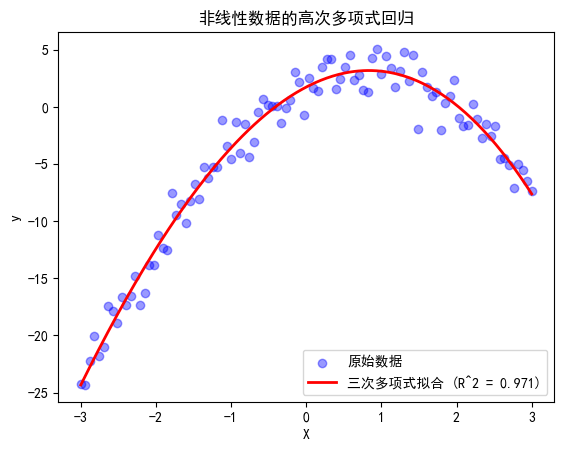

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

# 生成正弦曲线数据
np.random.seed(42)
X = np.linspace(-3, 3, 100)
y = 2 + 3*X - 2*X**2 + np.random.randn(100)*1.5

# 构建多项式回归管道
degree = 3  # 可修改为不同阶数观察过拟合现象
poly_model = make_pipeline(
    PolynomialFeatures(degree),
    LinearRegression()
)
poly_model.fit(X.reshape(-1,1), y) # 注意fit时候一定把X.reshape(-1,1)将X转换为列向量
# 此处X是递增的，所以不用排序，如果X是无序的，要先排序再可视化
"""
pipeline的作用是将PolynomialFeatures和LinearRegression组合在一起，先进行多项式特征转换，再把转换后的特征传入线性回归模型进行拟合
多项式回归模型:调用PolynomialFeatures，参数degree=3表示三次多项式
线性回归模型:调用LinearRegression进行拟合
"""

# 预测与评估
X_test = np.linspace(-3, 3, 300)
y_pred = poly_model.predict(X_test.reshape(-1,1))

# 可视化对比
plt.scatter(X, y, color='blue', alpha=0.4, label='原始数据')
plt.plot(X_test, y_pred, color='red', linewidth=2, 
         label=f'三次多项式拟合 (R^2 = {poly_model.score(X.reshape(-1,1), y):.3f})')
plt.title("非线性数据的高次多项式回归")
plt.xlabel('X'), plt.ylabel('y'), plt.legend()
plt.show()

### N元高次多项式回归

N元高次多项式回归是将多元线性回归模型扩展到高阶多项式形式的方法，可以捕捉变量间的非线性关系。下面是这一方法的详细解析：

**数学基础**

单变量多项式回归

对于单变量情况，多项式回归模型形式为：

$$y = \beta_0 + \beta_1 x + \beta_2 x^2 + \beta_3 x^3 + ... + \beta_d x^d + \epsilon$$

其中：

$y$ 是因变量
$x$ 是自变量
$\beta_0, \beta_1, ..., \beta_d$ 是系数
$d$ 是多项式的阶数
$\epsilon$ 是误差项
N元多项式回归
对于N元情况，扩展为：

$$y = \beta_0 + \sum_{i=1}^{n} \beta_i x_i + \sum_{i=1}^{n}\sum_{j=i}^{n} \beta_{ij} x_i x_j + \sum_{i=1}^{n}\sum_{j=i}^{n}\sum_{k=j}^{n} \beta_{ijk} x_i x_j x_k + ... + \epsilon$$

这个公式包含了所有变量的主效应（一次项）和交互效应（高次项）。

**数学推导**

在多项式回归中，我们首先进行特征转换，将原始特征扩展到多项式空间：

原始特征: $X = [x_1, x_2, ..., x_n]$
转换后特征: $X_{poly} = [1, x_1, x_2, ..., x_n, x_1^2, x_1x_2, ..., x_n^2, ...]$
然后使用最小二乘法求解系数向量 $\beta$：

$$\hat{\beta} = (X_{poly}^T X_{poly})^{-1} X_{poly}^T y$$

此过程实质上是将非线性回归问题转化为线性回归问题，通过扩展特征空间实现。

注意事项
过拟合风险: 高阶多项式容易导致过拟合，尤其是当样本量较小时
多重共线性: 高阶项之间可能存在强相关性，影响模型稳定性
标准化: 建议对原始特征进行标准化，避免高次幂导致的数值不稳定性
复杂度控制: 通常使用正则化方法控制模型复杂度

模型系数：[0.191 1.666 0.438 3.066 0.054]
RMSE: 0.958, R²: 0.997


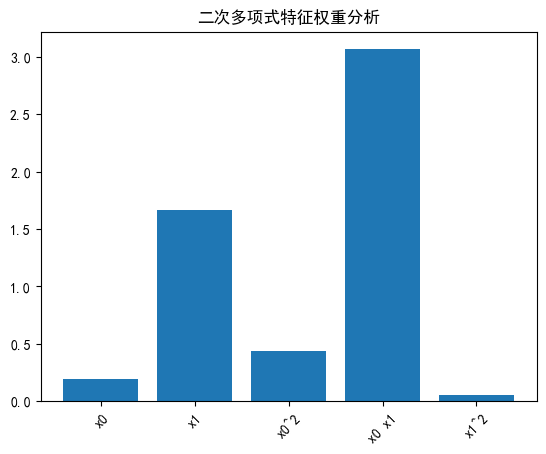

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# 生成二元非线性数据
np.random.seed(42)
X1 = np.random.rand(100, 2) * 5  # 两个特征维度 # 生成100个样本，每个样本有两个特征
y = 0.5*X1[:,0]**2 + 2*X1[:,1] + 3*X1[:,0]*X1[:,1] + np.random.randn(100)

# 划分训练测试集
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2)

# 构建二次多项式回归模型（包含交叉项）
poly = PolynomialFeatures(degree=2, include_bias=False) # degree=2表示二次多项式，include_bias=False表示不包含常数项。这里包含了交叉项
X_poly_train = poly.fit_transform(X_train) # 把训练集X_train转换为二次多项式特征，就是上面公式的X_poly
X_poly_test = poly.transform(X_test)

model = LinearRegression()
model.fit(X_poly_train, y_train) # 把二次多项式特征X_poly_train传入线性回归模型进行拟合

# 评估指标
y_pred = model.predict(X_poly_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred)) # 均方根误差RMSE
r2 = r2_score(y_test, y_pred)

print(f"模型系数：{model.coef_.round(3)}")
print(f"RMSE: {rmse:.3f}, R²: {r2:.3f}")

# 特征重要性可视化（以第一个样本为例）
plt.bar(range(len(poly.get_feature_names_out())), model.coef_) # bar是柱状图
plt.xticks(ticks=range(5), labels=poly.get_feature_names_out(), rotation=45) # 设置x轴刻度
plt.title("二次多项式特征权重分析")
plt.show()

## **0.5** 序列相关性表达
    阅读下面代码，观察运行的结果，解释出现这个结果的原因。

**1. 皮尔逊相关系数 (Pearson Correlation Coefficient)**

皮尔逊相关系数用于衡量两个变量之间的线性关系强度。

数学公式

$$r_{xy} = \frac{\sum_{i=1}^{n}(x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_{i=1}^{n}(x_i - \bar{x})^2 \sum_{i=1}^{n}(y_i - \bar{y})^2}}$$

其中：

- $\bar{x}$ 是 x 的平均值
- $\bar{y}$ 是 y 的平均值

**2. 自相关函数 (ACF)**

自相关函数测量时间序列与其自身滞后版本之间的相关性。

数学公式

$$\rho_k = \frac{\sum_{t=k+1}^{T}(y_t - \bar{y})(y_{t-k} - \bar{y})}{\sum_{t=1}^{T}(y_t - \bar{y})^2}$$

其中：

- $\rho_k$ 是滞后 k 阶的自相关系数
- $y_t$ 是时间 t 的序列值
- $\bar{y}$ 是序列的平均值

**3. 偏自相关函数 (PACF)**

偏自相关函数测量时间序列与其滞后 k 阶版本之间的直接关系，排除中间滞后的影响。

数学推导

偏自相关可以通过递归计算。最常用的方法是 Yule-Walker 方程或 Levinson-Durbin 递归算法：

1. 滞后 1 阶的偏自相关即为滞后 1 阶的自相关: $\phi_{1,1} = \rho_1$
2. 对于滞后 k > 1:
$$\phi_{k,k} = \frac{\rho_k - \sum_{j=1}^{k-1}\phi_{k-1,j}\rho_{k-j}}{1 - \sum_{j=1}^{k-1}\phi_{k-1,j}\rho_j}$$

其中 $\phi_{k,j} = \phi_{k-1,j} - \phi_{k,k}\phi_{k-1,k-j}$ 对 j = 1, 2, ..., k-1

手动计算皮尔逊系数: 0.8921
Scipy计算结果: 0.8921
手动计算的自相关系数: [1.0, 0.8646686416765924, 0.7221449913478966, 0.5532375718126474, 0.39675839674513325, 0.3085834573033586, 0.2555662725139739, 0.3004038325545539, 0.39470150470016435, 0.5162387290628443, 0.623357617199536, 0.6998038247570406, 0.6901509273681623, 0.6160652877276112, 0.49699119391739793, 0.32604260186688055, 0.20130489995298056, 0.0978368232885823, 0.06414637270097563, 0.09335717347837899, 0.1638055451724086]
使用statsmodels计算的自相关系数: [1.         0.86466864 0.72214499 0.55323757 0.3967584  0.30858346
 0.25556627 0.30040383 0.3947015  0.51623873 0.62335762 0.69980382
 0.69015093 0.61606529 0.49699119 0.3260426  0.2013049  0.09783682
 0.06414637 0.09335717 0.16380555]
使用statsmodels计算的偏自相关系数: [ 1.          0.87340267 -0.10941443 -0.20528022 -0.05881935  0.20656704
  0.06596385  0.34242693  0.26859463  0.25101401  0.13559047  0.23707351
 -0.10909934 -0.08103339 -0.09822343 -0.34113781 -0.12275852 -0.23502114
 -0.21576629 -0.22695784 -0.1214661 ]


<Figure size 1200x600 with 0 Axes>

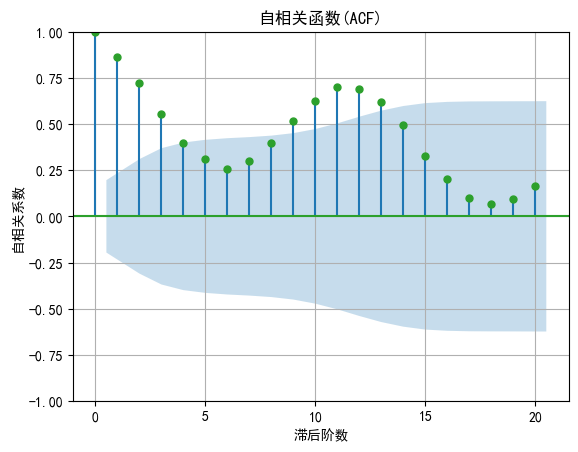

<Figure size 1200x600 with 0 Axes>

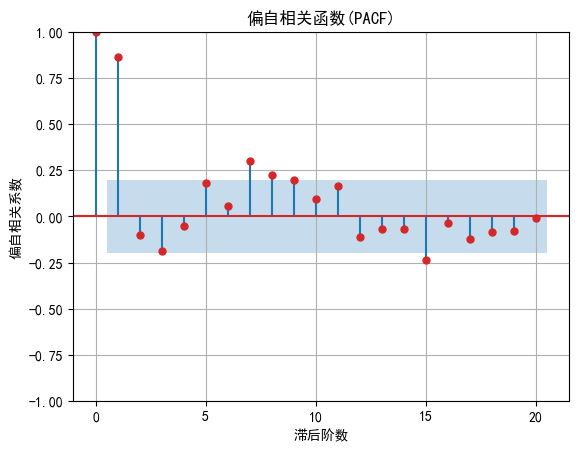

'阴影部分表示置信区间\n自相关函数(ACF)和偏自相关函数(PACF)的图形\n1.ACF和PACF图的结合使用可以帮助我们选择ARIMA模型的参数(p,d,q)\n2. ACF图中，滞后阶数越大，自相关系数越小，说明序列的自相关性逐渐减弱; PACF图中，滞后阶数越大，偏自相关系数越小，说明序列的偏自相关性逐渐减弱\n3. ACF和PACF图的截尾或拖尾特征可以帮助我们判断序列的平稳性:\nACF图中，截尾表示序列是平稳的，拖尾表示序列是非平稳的; PACF图中，截尾表示序列是平稳的，拖尾表示序列是非平稳的\n4.ACF和PACF图的结合使用可以帮助我们选择ARIMA模型的参数(p,d,q)\n'

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置中文字体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号'-'显示为方块的问题
# =====================
# 1. 数据生成（模拟时间序列）
# =====================
np.random.seed(42)
t = np.arange(100)
trend = 0.1 * t
seasonality = 3 * np.sin(2 * np.pi * t / 12)
noise = np.random.normal(0, 1, 100)
series = trend + seasonality + noise
"""生成一个包含趋势项(线性函数)、季节项(正弦波)和噪声项(高斯分布)的合成时间序列
趋势项: 0.1 * t
季节项: 3 * sin(2 * π * t / 12)
噪声项: np.random.normal(0, 1, 100)
合成时序数据: trend + seasonality + noise
"""

# =====================
# 2. 皮尔逊相关系数
# =====================
def manual_pearson(x, y):
    """手动实现皮尔逊相关系数"""
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    numerator = np.sum((x - x_mean) * (y - y_mean)) # 协方差
    denominator = np.sqrt(np.sum((x - x_mean)**2) * np.sum((y - y_mean)**2)) # 方差，作为分母
    return numerator / denominator

# 计算两种方式（手动实现 vs 库函数）
x = series[:-1]  # 前99个数据点
y = series[1:]   # 后99个数据点

pearson_manual = manual_pearson(x, y) # 手动计算皮尔逊系数
pearson_scipy = pearsonr(x, y)[0] # 使用scipy库的pearsonr函数计算皮尔逊系数！

print(f"手动计算皮尔逊系数: {pearson_manual:.4f}")
print(f"Scipy计算结果: {pearson_scipy:.4f}")

# =====================
# 3. 自相关分析（ACF）
# =====================
def manual_acf_correct(series, lags=3):
    n = len(series)
    mean = np.mean(series)
    # 方差（分母）
    variance = np.sum((series - mean)**2)
    acf_values = []
    
    for lag in range(lags+1):
        # 协方差（分子）
        covariance = np.sum((series[lag:] - mean) * (series[:n-lag] - mean)) if lag > 0 else variance
        # 自相关系数
        acf = covariance / variance # 自相关系数
        acf_values.append(acf)
    
    return acf_values
manual_acf = manual_acf_correct(series, lags=20) # 手动计算自相关系数（滞后20阶）
    
# 使用statsmodels计算（滞后20阶）
acf_values = acf(series, nlags=20, fft=False) # 调用acf计算自相关系数，nlags=20表示滞后20阶，fft=False表示不使用FFT加速计算

print(f"手动计算的自相关系数: {manual_acf}")
print(f"使用statsmodels计算的自相关系数: {acf_values}")

# 可视化（带置信区间）
plt.figure(figsize=(12, 6))
plot_acf(series, lags=20, title="自相关函数(ACF)", color='#2ca02c')
plt.xlabel("滞后阶数")
plt.ylabel("自相关系数")
plt.grid(True)

# =====================
# 4. 偏自相关分析（PACF）
# =====================
# 使用statsmodels计算（滞后20阶）
pacf_values = pacf(series, nlags=20) # 调用pacf计算偏自相关系数，nlags=20表示滞后20阶
print(f"使用statsmodels计算的偏自相关系数: {pacf_values}")
# 可视化（带置信区间）
plt.figure(figsize=(12, 6))
plot_pacf(series, lags=20, title="偏自相关函数(PACF)", color='#d62728')
plt.xlabel("滞后阶数")
plt.ylabel("偏自相关系数")
plt.grid(True)

plt.show()
"""阴影部分表示置信区间
自相关函数(ACF)和偏自相关函数(PACF)的图形
1.ACF和PACF图的结合使用可以帮助我们选择ARIMA模型的参数(p,d,q)
2. ACF图中，滞后阶数越大，自相关系数越小，说明序列的自相关性逐渐减弱; PACF图中，滞后阶数越大，偏自相关系数越小，说明序列的偏自相关性逐渐减弱
3. ACF和PACF图的截尾或拖尾特征可以帮助我们判断序列的平稳性:
ACF图中，截尾表示序列是平稳的，拖尾表示序列是非平稳的; PACF图中，截尾表示序列是平稳的，拖尾表示序列是非平稳的
4.ACF和PACF图的结合使用可以帮助我们选择ARIMA模型的参数(p,d,q)
"""

周期大概是12（从ACF图上看0-12大概是一个周期）

PACF图可看出一阶比较明显，二阶开始就很小了，所以最佳阶数是1阶

# 第一部分 基础练习

基于提供的近两年WIG20数据的收盘价进行时间序列分析

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

In [18]:
stock_path = './WIG20.csv' 
stock_ = pd.read_csv(stock_path)
display(stock_.head(5))

,日期,收盘,开盘,高,低,交易量,涨跌幅
0,2025-4-22,"2,700.41","2,652.51","2,700.41","2,652.51",28.96M,2.15%
1,2025-4-17,"2,643.52","2,629.92","2,669.82","2,626.36",23.27M,1.06%
2,2025-4-16,"2,615.84","2,596.22","2,640.92","2,589.05",26.33M,-0.10%
3,2025-4-15,"2,618.49","2,611.80","2,659.36","2,591.33",31.36M,0.39%
4,2025-4-14,"2,608.21","2,578.66","2,609.56","2,573.12",15.57M,3.12%


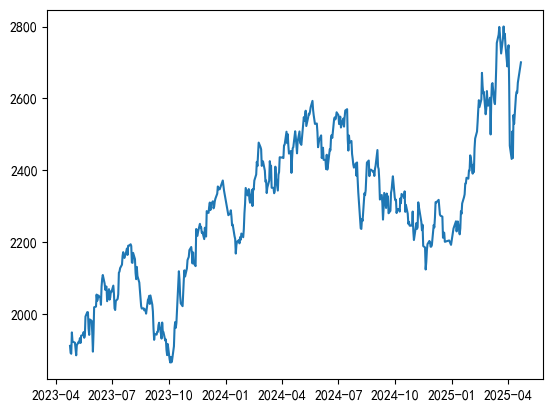

In [19]:
stock_['Date'] = pd.to_datetime(stock_['日期'])
stock_ = stock_.set_index('Date')
stock_.index = pd.DatetimeIndex(stock_.index).to_period('D').to_timestamp()  # 'D'表示日频率
# 本次作业中只使用收盘数据
stock_['Close'] = stock_['收盘'].str.replace(',', '').astype(float)
stock = stock_[['Close']]
# 倒转数据顺序
stock = stock[::-1]
plt.plot(stock)
plt.show()
# display(stock)

## **1.1** 成分分解

<Figure size 640x480 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

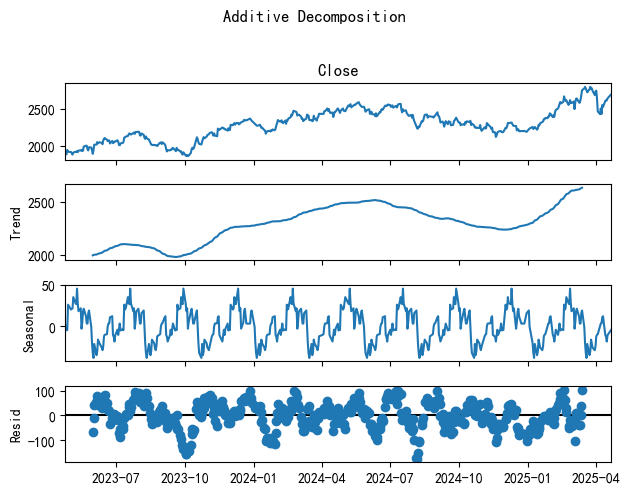

"plt.plot(result.trend, label='趋势') # trend\nplt.plot(result.seasonal, label='季节性') # seasonal\nplt.plot(result.resid, label='残差') # resid!!!!!\nplt.legend() # 显示图例!!!!\nplt.title('加法分解')"

In [20]:
# -------------------------------------------------------------------------
# TODO:使用加法分解作用于数据并绘制分解后的图像
# 加法模型分解

result = seasonal_decompose(stock['Close'], model='additive', period=50)
plt.suptitle('WIG20收盘价加法分解')
plot(result, "Additive Decomposition")
plt.show()

# 另一种可视化方式（画在同一张图上）：
"""plt.plot(result.trend, label='趋势') # trend
plt.plot(result.seasonal, label='季节性') # seasonal
plt.plot(result.resid, label='残差') # resid!!!!!
plt.legend() # 显示图例!!!!
plt.title('加法分解')"""
# -------------------------------------------------------------------------

## **1.2** 平稳序列

对数据迭代地进行差分，直到得到一个平稳序列(p_value<0.05)，绘制原始序列和最终得到的序列

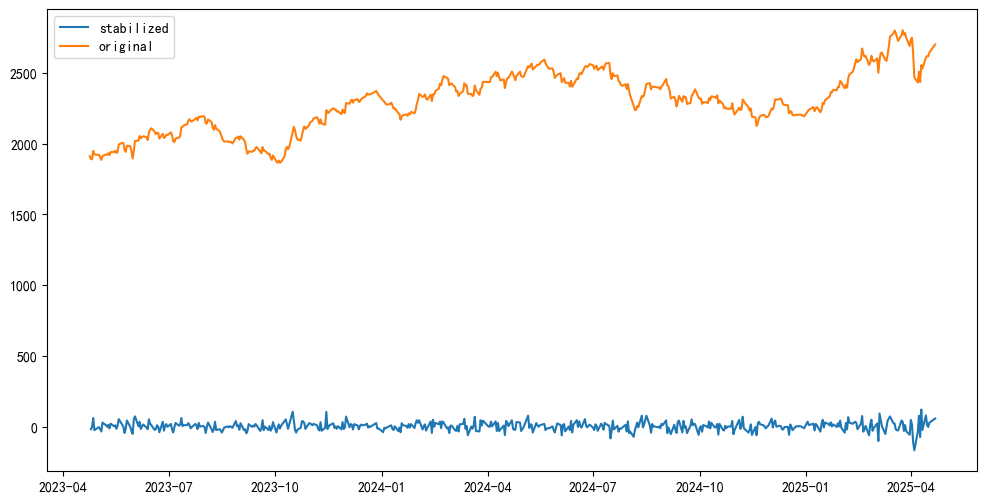

In [21]:
# -------------------------------------------------------------------------
# TODO  
# 使用adfuller检验平稳性获取p_value
# 对数据迭代地进行差分，直到得到一个平稳序列(p_value<0.05)，绘制原始序列和最终得到的序列

# 差分平稳化函数
def difference_until_stationary(data, max_diff=5):
    diff_data = data
    for i in range(max_diff):
        adf_result = adfuller(diff_data.dropna())
        if adf_result[1] < 0.05: return diff_data, i
        diff_data = diff_data.diff()
    return diff_data, max_diff

# 差分平稳化
stock_diff, diff_count = difference_until_stationary(stock)

plt.figure(figsize=(12, 6))
plt.plot(stock_diff, label='stabilized')
plt.plot(stock, label='original')
plt.legend()
plt.show()
# -------------------------------------------------------------------------

## **1.3** 序列自（相关）回归模型

In [ ]:
# -------------------------------------------------------------------------
# TODO:使用statsmodels.tsa.stattools.arma_order_select_ic函数选择ARMA模型的阶数, 再构建ARMA模型
from statsmodels.tsa.stattools import arma_order_select_ic
from statsmodels.tsa.arima.model import ARIMA
# 自动选择最优阶数
stock_diff = stock_diff.dropna() # !!!!!! 重要
order_select = arma_order_select_ic(stock_diff.dropna(), max_ar = 4, max_ma = 2, ic = ['aic', 'bic']) 
# 选择AIC和BIC最小的阶数, max_ar: AR最大阶数（使用过去p个时间点的值来预测当前值X_t）4, max_ma: MA最大阶数（使用过去 q 个误差项（残差）来修正预测）2
best_order = order_select['aic_min_order']
model = ARIMA(stock_diff.dropna(), order=(best_order[0],0,best_order[1]))
arma_result = model.fit()
print(f"最优阶数选择(p,q): {best_order}")
print(arma_result.summary())
# -------------------------------------------------------------------------

/Users/gaojingxing/miniconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/gaojingxing/miniconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


最优阶数选择(p,q): (0, 0)
                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  497
Model:                          ARIMA   Log Likelihood               -2421.915
Date:                Sun, 27 Apr 2025   AIC                           4847.831
Time:                        13:21:30   BIC                           4856.248
Sample:                             0   HQIC                          4851.134
                                - 497                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.5893      1.422      1.118      0.264      -1.197       4.376
sigma2      1000.5268     43.742     22.873      0.000     914.794    1086.259
Ljung-Box (L1) (Q):             

/Users/gaojingxing/miniconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/gaojingxing/miniconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/gaojingxing/miniconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


## **1.4** 线性回归-多项式回归

线性回归模型均方误差: 16168.8703
线性回归模型R²值: 0.6423


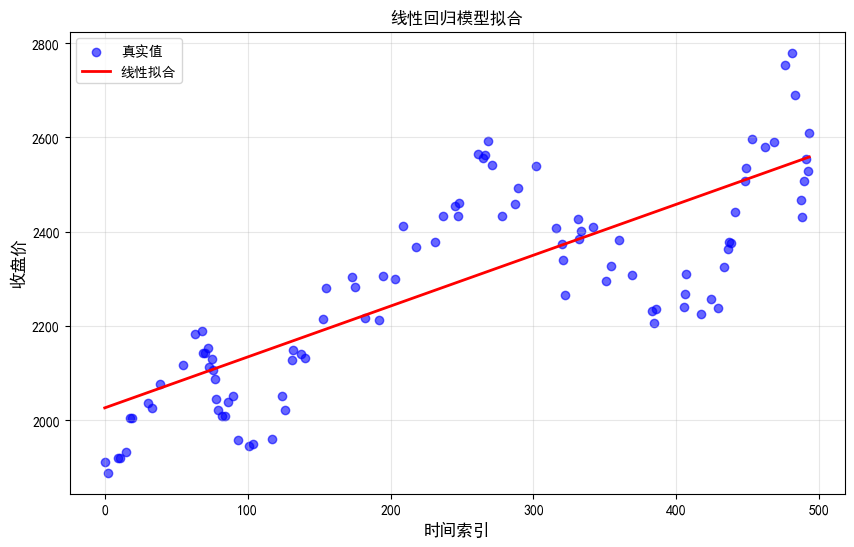

多项式回归模型均方误差: 12474.2461
多项式回归模型R²值: 0.7240


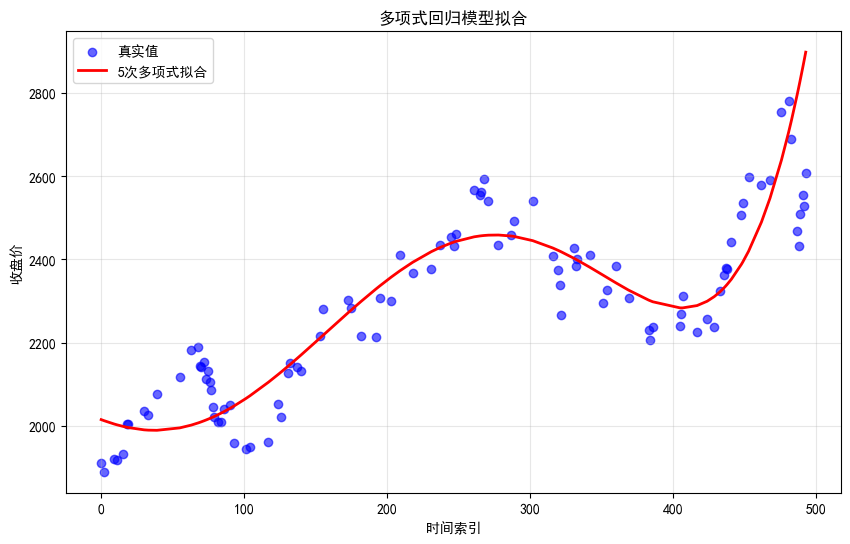

In [45]:
# -------------------------------------------------------------------------
# TODO: 线性回归模型拟合，多项式回归模型拟合
# 线性回归模型拟合
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
# 生成特征和目标变量
X = np.arange(len(stock)).reshape(-1, 1)  # 时间序列索引作为特征
y = stock.values  # 使用原始数据作为目标变量
# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# TODO 创建线性回归模型，拟合，计算均方误差和R²值并可视化
model1 = LinearRegression()
model1.fit(X_train, y_train)
y_pred = model1.predict(X_test)

print(f"线性回归模型均方误差: {mean_squared_error(y_test, y_pred):.4f}")
print(f"线性回归模型R²值: {r2_score(y_test, y_pred):.4f}")

# 可视化
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', alpha=0.6, label='真实值')
X_sorted = np.sort(X_test, axis=0) # 绘图时候需要排序！！！！！
y_sorted = model1.predict(X_sorted) # 排序后再重新预测！！
plt.plot(X_sorted, y_sorted, 'r-', linewidth=2, label=f'线性拟合') # r-表示红色实线，'o'表示圆点！！！
plt.title('线性回归模型拟合')
plt.xlabel('时间索引', fontsize=12)
plt.ylabel('收盘价', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3) # 画网格线
plt.show()
# ---------------------------------------------------------------------------

# 多项式回归模型拟合
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
# TODO 创建多项式回归模型管道，拟合，计算均方误差和R²值并可视化

degree = 5
model2 = make_pipeline(
    PolynomialFeatures(degree = degree),
    LinearRegression()
)
model2.fit(X_train, y_train)

X_sorted = np.sort(X_test, axis=0)
y_sorted = model2.predict(X_sorted) # 原始测试集X_test是随机分割的，没有排序，导致曲线绘制混乱，所以必须排序！！！！
y_pred_poly = model2.predict(X_test) # 绘图时必须排序，再重新预测

print(f"多项式回归模型均方误差: {mean_squared_error(y_test, y_pred_poly):.4f}")
print(f"多项式回归模型R²值: {r2_score(y_test, y_pred_poly):.4f}") # R²值越接大拟合效果越好
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', alpha=0.6, label='真实值')
plt.plot(X_sorted, y_sorted, color='red', linewidth=2, label=f'{degree}次多项式拟合')
plt.title('多项式回归模型拟合')
plt.xlabel('时间索引')
plt.ylabel('收盘价')
plt.legend()
plt.grid(True, alpha=0.3) # 画网格线
plt.show()
# -------------------------------------------------------------------------


## **1.5** 序列相关性表达

<Figure size 1200x600 with 0 Axes>

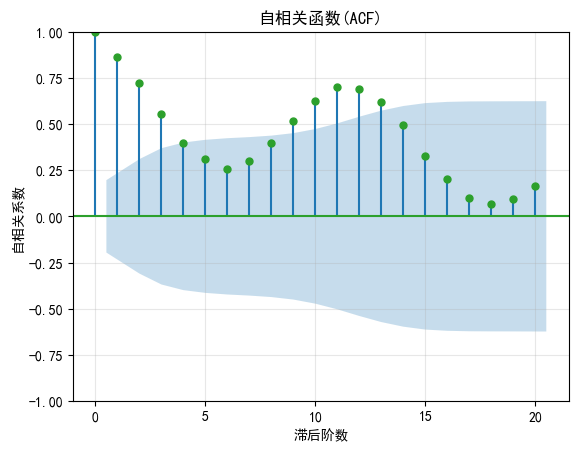

<Figure size 1200x600 with 0 Axes>

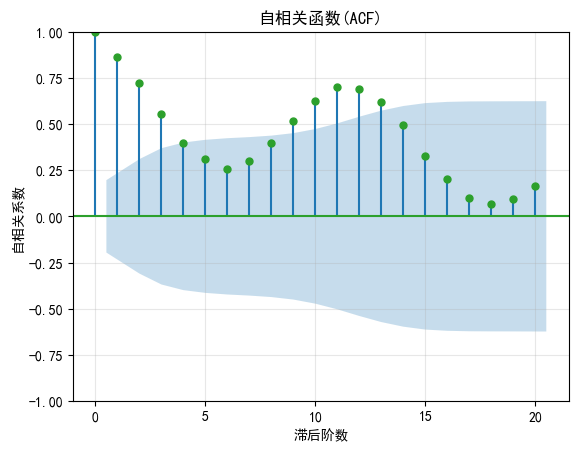

In [49]:
# -------------------------------------------------------------------------
# TODO: 序列相关性分析，包括自相关函数(ACF)和偏自相关函数(PACF)
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# 对 stock 实现自相关函数(ACF)和偏自相关函数(PACF)可视化
lag = 20
acf_values = acf(stock_diff.dropna(), nlags = lag, fft = False)
plt.figure(figsize=(12, 6))
plot_acf(series, lags=lag, title="自相关函数(ACF)", color='#2ca02c')
plt.xlabel("滞后阶数")
plt.ylabel("自相关系数")
plt.grid(True, alpha = 0.3)

pacf_values = pacf(stock_diff.dropna(), nlags = lag)
plt.figure(figsize=(12, 6))
plot_acf(series, lags=lag, title="自相关函数(ACF)", color='#2ca02c')
plt.xlabel("滞后阶数")
plt.ylabel("自相关系数")
plt.grid(True, alpha = 0.3)
plt.show()
# -------------------------------------------------------------------------

# 第二部分 进阶练习

## **2.1** 二次指数平滑

均值滑动平均的窗口内各个点的权重相同，而指数平滑对过去的数据赋予不同权重，距离现在时刻更近的观测值被赋予更大的权重。二次指数平滑引入两个平滑参数$\alpha$和$\beta$，分别用于平滑水平(level)和趋势(trend)

二次指数平滑的公式如下
$$l_{t} = \alpha y_t + (1-\alpha)(l_{t-1} + b_{t-1})$$
$$b_{t} = \beta(l_t - l_{t-1}) + (1-\beta)b_{t-1}$$

其中$y_t$为原始数据，$l_t$为平滑后的水平，$b_t$为平滑后的趋势，认为$l_{-1}=b_{-1}=0$

平滑后的数据$\hat{y}$的计算公式为
$$
\hat{y}_{t+h} = l_t + hb_t
$$
其中$h$为窗口大小，$0\leq t\leq t_{\max}-h$

/var/folders/hn/gy9cbfnj2fxdtcx87x8ptv_w0000gn/T/ipykernel_7595/3527025698.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  lt[0], bt[0] = series[0], series[1] - series[0]
/var/folders/hn/gy9cbfnj2fxdtcx87x8ptv_w0000gn/T/ipykernel_7595/3527025698.py:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  lt[i] = alpha * series[i] + (1 - alpha) * (lt[i-1] + bt[i-1])


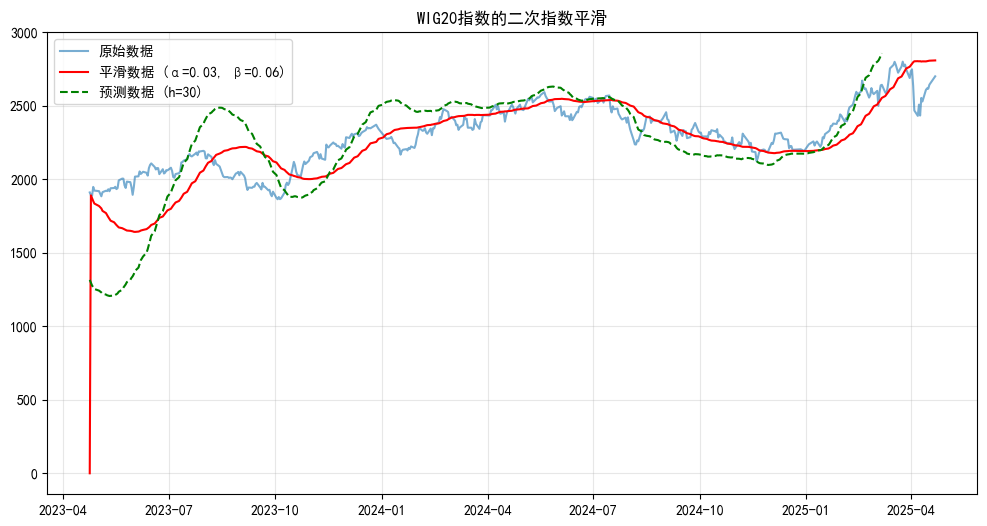

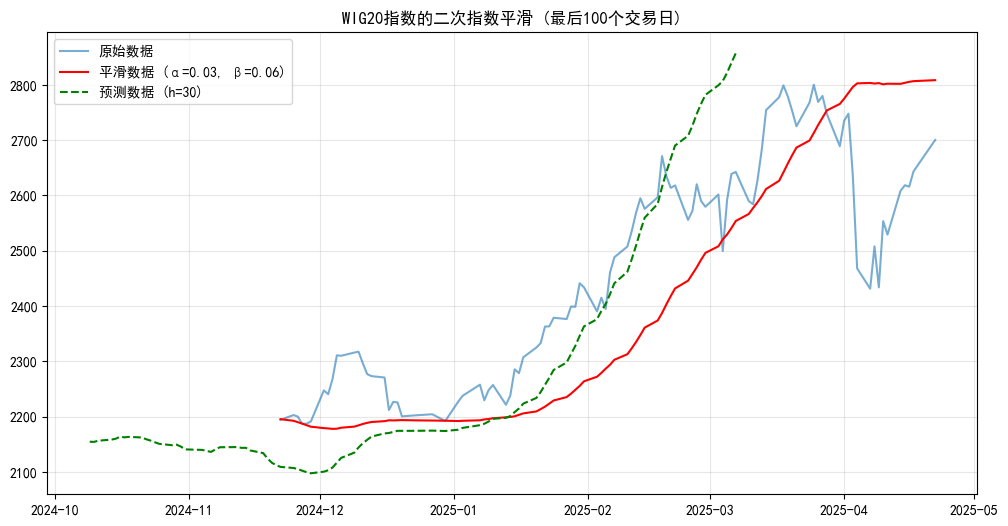

In [ ]:
# -------------------------------------------------------------------------
# TODO: (1pt) 对数据进行二次指数平滑，绘制平滑结果和原图像
# 参数取alpha=0.03, beta=0.06, h=30


# 二次指数平滑函数
def double_exponential_smoothing(series, alpha=0.03, beta=0.06, h=30):
    """
    对时间序列进行二次指数平滑
    
    参数:
    series -- 时间序列数据
    alpha -- 水平平滑参数 (0 < alpha < 1)
    beta -- 趋势平滑参数 (0 < beta < 1)
    h -- 预测窗口大小
    
    返回:
    smoothed -- 平滑后的时间序列
    forecast -- 预测的时间序列
    """
    lt, bt = np.zeros(len(series)), np.zeros(len(series))
    smoothed = np.zeros(len(series))
    lt[0], bt[0] = series[0], series[1] - series[0] # bt是趋势项，所以初始值为series[1] - series[0]
    for i in range(1, len(series)):
        lt[i] = alpha * series[i] + (1 - alpha) * (lt[i-1] + bt[i-1])
        bt[i] = beta * (lt[i] - lt[i-1]) + (1 - beta) * bt[i-1]
        smoothed[i] = lt[i - 1] + bt[i - 1] # 平滑值基于上一期的水平和趋势!!
    forecast = np.zeros(len(series) - h)
    for i in range(len(series) - h): forecast[i] = lt[i] + h * bt[i]
    return smoothed, forecast

# 对股票数据进行二次指数平滑
alpha = 0.03
beta = 0.06
h = 30

# 应用二次指数平滑模型
smoothed, forecast = double_exponential_smoothing(stock['Close'], alpha, beta, h)

# 创建结果的DataFrame
smoothed_series = pd.Series(smoothed, index=stock.index)
forecast_series = pd.Series(forecast, index=stock.index[:-h])

# 绘制结果
plt.figure(figsize=(12, 6))
plt.plot(stock, label='原始数据', alpha=0.6)
plt.plot(smoothed_series, label=f'平滑数据 (α={alpha}, β={beta})', color='red')
plt.plot(forecast_series, label=f'预测数据 (h={h})', color='green', linestyle='--')
plt.title('WIG20指数的二次指数平滑')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# 放大显示最后100个交易日的结果
last_100 = slice(-100, None)
plt.figure(figsize=(12, 6))
plt.plot(stock.iloc[last_100], label='原始数据', alpha=0.6)
plt.plot(smoothed_series.iloc[last_100], label=f'平滑数据 (α={alpha}, β={beta})', color='red')
plt.plot(forecast_series.iloc[max(-100, -len(forecast_series)):], 
         label=f'预测数据 (h={h})', color='green', linestyle='--')
plt.title('WIG20指数的二次指数平滑 (最后100个交易日)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()
# -------------------------------------------------------------------------

## **2.2** 偏自相关分析（PACF）

在第零部分给出了皮尔逊相关系数和自相关分析的手动实现，在这里需要实现偏自相关分析的手动实现

偏自相关函数测量时间序列与其滞后 k 阶版本之间的直接关系，排除中间滞后的影响。

**数学推导**

偏自相关可以通过递归计算。最常用的方法是 Yule-Walker 方程或 Levinson-Durbin 递归算法：

1. 滞后 1 阶的偏自相关即为滞后 1 阶的自相关: $\phi_{1,1} = \rho_1$
2. 对于滞后 k > 1:
$$\phi_{k,k} = \frac{\rho_k - \sum_{j=1}^{k-1}\phi_{k-1,j}\rho_{k-j}}{1 - \sum_{j=1}^{k-1}\phi_{k-1,j}\rho_j}$$

其中 $\phi_{k,j} = \phi_{k-1,j} - \phi_{k,k}\phi_{k-1,k-j}$ 对 j = 1, 2, ..., k-1

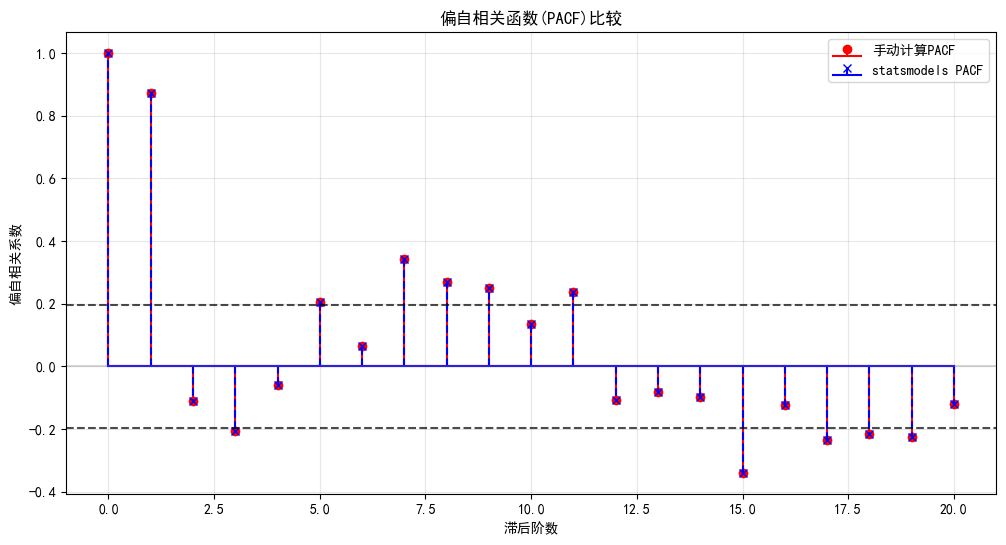

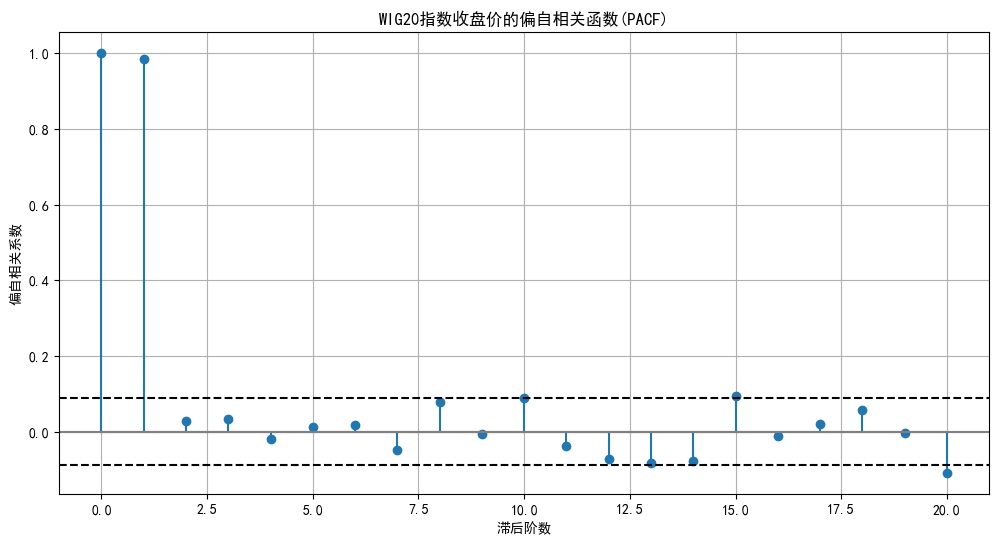

偏自相关分析结果解释：
1. 显著的PACF值表明该滞后对时间序列有直接影响
2. 在AR(p)模型中，PACF在滞后p之后应该截尾
3. 超出虚线范围的值表示统计显著的相关性
4. 显著的滞后阶数: [1, 10, 15, 20]


In [67]:
from statsmodels.tsa.stattools import pacf
# -------------------------------------------------------------------------
# TODO：手动实现偏自相关函数(PACF)，并与statsmodels库计算的结果进行比较

def manual_pacf(series, lags=20):
    """
    手动计算偏自相关函数，使用Levinson-Durbin递归
    
    参数:
    series -- 时间序列数据
    lags -- 最大滞后阶数
    
    返回:
    pacf_values -- 偏自相关系数，包括lag=0的值(恒为1)
    """
    n = len(series)
    mean = np.mean(series)
    var = np.sum((series - mean) ** 2) / n
    acf_values, pacf_values = np.zeros(lags + 1), np.zeros(lags + 1)
    acf_values[0] = 1 # lag = 0的自相关系数恒为1
    for k in range(1, lags + 1):
        cov = np.sum((series[k:] - mean) * (series[:-k] - mean)) / (n - k)# 协方差
        acf_values[k] = cov / var # 自相关系数 = 协方差/方差!!!! 
        # ρₖ = Cov(Xₜ, Xₜ₋ₖ) / (Var(Xₜ)Var(Xₜ₋ₖ))^(1/2) = Cov(Xₜ, Xₜ₋ₖ)/Var(Xₜ) (平稳性 ->Var(Xₜ) = Var(Xₜ₋ₖ))
    phi = np.zeros((lags + 1, lags + 1))
    phi[1, 1] = acf_values[1] # 1阶偏自相关系数 = 自相关系数
    pacf_values[0] = 1 # lag = 0的偏自相关系数恒为1
    pacf_values[1] = phi[1, 1]
    for k in range(2, lags + 1):
        numerator = acf_values[k] - np.sum(phi[k - 1, 1:k] * acf_values[k - 1:0:-1])
        denominator = 1 - np.sum(phi[k - 1, 1:k] * acf_values[1:k])
        phi[k, k] = numerator / denominator
        pacf_values[k] = phi[k, k]
        for j in range(1, k): phi[k, j] = phi[k - 1, j] - phi[k, k] * phi[k - 1, k - j]
    return pacf_values

# 测试函数
# 使用前面已生成的序列数据测试
np.random.seed(42)
t = np.arange(100)
trend = 0.1 * t
seasonality = 3 * np.sin(2 * np.pi * t / 12)
noise = np.random.normal(0, 1, 100)
test_series = trend + seasonality + noise

# 计算手动和库函数的PACF
manual_pacf_values = manual_pacf(test_series, lags=20)
statsmodels_pacf_values = pacf(test_series, nlags=20)

# 比较结果
plt.figure(figsize=(12, 6))
plt.stem(range(len(manual_pacf_values)), manual_pacf_values, linefmt='r-', markerfmt='ro', basefmt='r-', label='手动计算PACF')
plt.stem(range(len(statsmodels_pacf_values)), statsmodels_pacf_values, linefmt='b--', markerfmt='bx', basefmt='b-', label='statsmodels PACF')
plt.axhline(y=0, color='gray', linestyle='-', alpha=0.3)
plt.axhline(y=1.96/np.sqrt(len(test_series)), color='k', linestyle='--', alpha=0.7)
plt.axhline(y=-1.96/np.sqrt(len(test_series)), color='k', linestyle='--', alpha=0.7)
plt.title('偏自相关函数(PACF)比较')
plt.xlabel('滞后阶数')
plt.ylabel('偏自相关系数')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

# 应用于股票数据
stock_pacf = manual_pacf(stock.values, lags=20)

# 绘制股票数据的PACF
plt.figure(figsize=(12, 6))
plt.stem(range(len(stock_pacf)), stock_pacf)
plt.axhline(y=0, color='gray', linestyle='-')
plt.axhline(y=1.96/np.sqrt(len(stock)), color='k', linestyle='--')
plt.axhline(y=-1.96/np.sqrt(len(stock)), color='k', linestyle='--')
plt.title('WIG20指数收盘价的偏自相关函数(PACF)')
plt.xlabel('滞后阶数')
plt.ylabel('偏自相关系数')
plt.grid(True)
plt.show()

# 解释结果
print("偏自相关分析结果解释：")
print("1. 显著的PACF值表明该滞后对时间序列有直接影响")
print("2. 在AR(p)模型中，PACF在滞后p之后应该截尾")
print("3. 超出虚线范围的值表示统计显著的相关性")
significant_lags = np.where(np.abs(stock_pacf[1:]) > 1.96/np.sqrt(len(stock)))[0] + 1
print(f"4. 显著的滞后阶数: {significant_lags.tolist() if len(significant_lags) > 0 else '无'}")
# -------------------------------------------------------------------------